In [1]:
from google.colab import files
uploaded = files.upload()

Saving trn.csv to trn.csv
Saving tst.csv to tst.csv
Saving val.csv to val.csv


In [2]:
import io
import pandas as pd
trn_set = pd.read_csv(io.BytesIO(uploaded['trn.csv']))
val_set = pd.read_csv(io.BytesIO(uploaded['val.csv']))
tst_set = pd.read_csv(io.BytesIO(uploaded['tst.csv']))

# 1. Data Preprocessing with Sklearn

In [3]:
# Load packages

from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt

## 1.1 Loading Data

In [4]:
def load_data(dataframe):
    texts = dataframe["tweet"].tolist()
    labels = dataframe["type"].tolist()
    return texts, labels

Load the data and verify the size of each split

In [5]:
# Load data
trn_texts, trn_labels = load_data(trn_set)
val_texts, val_labels = load_data(val_set)
tst_texts, tst_labels = load_data(tst_set)

## 1.2 Constructing BoW Representations

In [6]:
vectorizer = CountVectorizer(lowercase=True, min_df=1, max_df=1.0, ngram_range=(1,1))
trn_data = vectorizer.fit_transform(trn_texts)
val_data = vectorizer.transform(val_texts)
tst_data = vectorizer.transform(tst_texts)

# Some basic information about data
vocab = vectorizer.vocabulary_
print("Vocab size = {}".format(len(vocab)))
print("Size of training data = {}".format(trn_data.shape))
print("Size of val data = {}".format(val_data.shape))
print("Size of test data = {}".format(tst_data.shape))

Vocab size = 138092
Size of training data = (111291, 138092)
Size of val data = (13912, 138092)
Size of test data = (13911, 138092)


## 1.3 Word Frequency Analysis

Text(0, 0.5, 'word frequency')

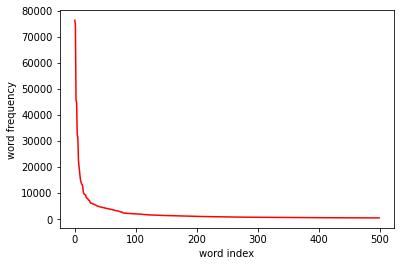

In [ ]:
word_counts = trn_data.sum(axis=0).tolist()[0]
sorted_word_counts = [i for i in sorted(enumerate(word_counts), key=lambda x:x[1], reverse=True)]
ivocab = {val:key for (key, val) in vocab.items()}
plt.plot(range(len(ivocab))[:500], [v[1] for v in sorted_word_counts][:500], color="red") # Only the top 500 words
plt.xlabel("word index")
plt.ylabel("word frequency")

# 2. Classification with Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# define a LR classifier

classifier = LogisticRegression(fit_intercept=True, penalty="l2", C=0.1, max_iter=200, solver="liblinear")
classifier.fit(trn_data, trn_labels)

LogisticRegression(C=0.1, max_iter=200, solver='liblinear')

In [ ]:
# Measure the performance on training and dev data
print("Training accuracy = {}".format(classifier.score(trn_data, trn_labels)))
print("Val accuracy = {}".format(classifier.score(val_data, val_labels)))

Training accuracy = 0.9441823687450018
Val accuracy = 0.9386141460609546


## 2.1 Classification Weight Analysis

In this section, we will look into the classifiers and find out the components of a Logistic Regression classifier in the lecture.

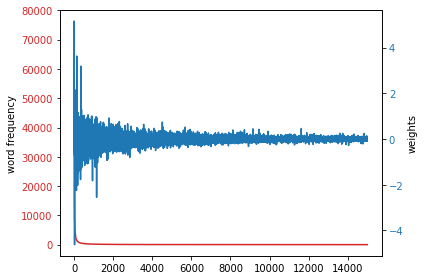

In [ ]:
FIRST=15000

weights = classifier.coef_.flatten()
word_counts = trn_data.sum(axis=0).tolist()[0]
sorted_word_counts = [i for i in sorted(enumerate(word_counts), key=lambda x:x[1], reverse=True)]
ivocab = {val:key for (key, val) in vocab.items()}

fig, ax1 = plt.subplots()

# Draw word frequency
color = "tab:red"
ax1.set_xlabel("")
ax1.set_ylabel("word frequency")
ax1.plot(range(len(ivocab))[:FIRST], [v[1] for v in sorted_word_counts][:FIRST], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color= "tab:blue"
ax2.set_ylabel("weights")
ax2.plot(range(len(ivocab))[:FIRST], [weights[v[0]] for v in sorted_word_counts][:FIRST], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

In [ ]:
# Load data
trn_texts, trn_labels = load_data(trn_set)
val_texts, val_labels = load_data(val_set)
tst_texts, tst_labels = load_data(tst_set)

In [ ]:
trn_labels_distribution = {}
for label in trn_labels:
  if label in trn_labels_distribution:
    trn_labels_distribution[label] = trn_labels_distribution[label] + 1
  else:
    trn_labels_distribution[label] = 1
print(trn_labels_distribution)

val_labels_distribution = {}
for label in val_labels:
  if label in val_labels_distribution:
    val_labels_distribution[label] = val_labels_distribution[label] + 1
  else:
    val_labels_distribution[label] = 1
print(val_labels_distribution)

tst_labels_distribution = {}
for label in tst_labels:
  if label in tst_labels_distribution:
    tst_labels_distribution[label] = tst_labels_distribution[label] + 1
  else:
    tst_labels_distribution[label] = 1
print(tst_labels_distribution)

{'valid': 55254, 'troll': 56037}
{'valid': 6868, 'troll': 7044}
{'valid': 6988, 'troll': 6923}


In [ ]:
vectorizer = CountVectorizer(lowercase=True, min_df=2, max_df=1.0, ngram_range=(1,1))
trn_data = vectorizer.fit_transform(trn_texts)
val_data = vectorizer.transform(val_texts)
tst_data = vectorizer.transform(tst_texts)

# Some basic information about data
vocab = vectorizer.vocabulary_
print("Vocab size = {}".format(len(vocab)))
print("Size of training data = {}".format(trn_data.shape))
print("Size of val data = {}".format(val_data.shape))
print("Size of test data = {}".format(tst_data.shape))

Vocab size = 28477
Size of training data = (111291, 28477)
Size of val data = (13912, 28477)
Size of test data = (13911, 28477)


Text(0, 0.5, 'word frequency')

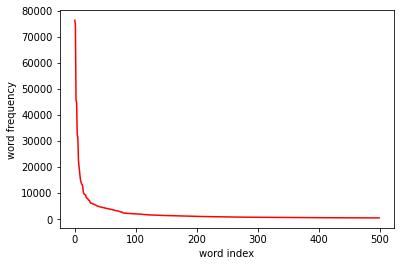

In [ ]:
word_counts = trn_data.sum(axis=0).tolist()[0]
sorted_word_counts = [i for i in sorted(enumerate(word_counts), key=lambda x:x[1], reverse=True)]
ivocab = {val:key for (key, val) in vocab.items()}
plt.plot(range(len(ivocab))[:500], [v[1] for v in sorted_word_counts][:500], color="red") # Only the top 500 words
plt.xlabel("word index")
plt.ylabel("word frequency")

It appears that Zipf's law applies here.

In [ ]:
# define a LR classifier

classifier = LogisticRegression(fit_intercept=True, penalty="l2", C=1, max_iter=200)
classifier.fit(trn_data, trn_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=1, max_iter=200)

In [ ]:
# Measure the performance on training and dev data
print("Training accuracy = {}".format(classifier.score(trn_data, trn_labels)))
print("Val accuracy = {}".format(classifier.score(val_data, val_labels)))

Training accuracy = 0.9679039634831208
Val accuracy = 0.949683726279471


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
vectorizer1 = CountVectorizer(min_df=2, max_df=0.8)
trn_data1 = vectorizer1.fit_transform(trn_texts)
val_data1 = vectorizer1.transform(val_texts)
tst_data1 = vectorizer1.transform(tst_texts)

vectorizer2 = CountVectorizer(min_df=5, max_df=0.8)
trn_data2 = vectorizer2.fit_transform(trn_texts)
val_data2 = vectorizer2.transform(val_texts)
tst_data2 = vectorizer2.transform(tst_texts)

vectorizer3 = CountVectorizer(min_df=2, max_df=1.0)
trn_data3 = vectorizer3.fit_transform(trn_texts)
val_data3 = vectorizer3.transform(val_texts)
tst_data3 = vectorizer3.transform(tst_texts)

vectorizer4 = CountVectorizer(min_df=5, max_df=1.0)
trn_data4 = vectorizer4.fit_transform(trn_texts)
val_data4 = vectorizer4.transform(val_texts)
tst_data4 = vectorizer4.transform(tst_texts)

In [ ]:
classifier1 = LogisticRegression(fit_intercept=True, penalty="l2", C=10.0, max_iter=200)
classifier2 = LogisticRegression(fit_intercept=True, penalty="l2", C=1.0, max_iter=200)
classifier3 = LogisticRegression(fit_intercept=True, penalty="l2", C=0.1, max_iter=200)
classifier4 = LogisticRegression(fit_intercept=True, penalty="l2", C=0.01, max_iter=200)
classifier5 = LogisticRegression(fit_intercept=False, penalty="l2", C=10.0, max_iter=200)
classifier6 = LogisticRegression(fit_intercept=False, penalty="l2", C=1.0, max_iter=200)
classifier7 = LogisticRegression(fit_intercept=False, penalty="l2", C=0.1, max_iter=200)
classifier8 = LogisticRegression(fit_intercept=False, penalty="l2", C=0.01, max_iter=200)

classifiers = [classifier1, classifier2, classifier3, classifier4, classifier5, classifier6, classifier7, classifier8]

In [ ]:
def print_results(classifier, trn_data, val_data, trn_labels=trn_labels, val_labels=val_labels):
  print("Training accuracy = {}".format(classifier.score(trn_data, trn_labels)))
  print("Val accuracy = {}".format(classifier.score(val_data, val_labels)))

In [ ]:
trn_datasets = [trn_data1, trn_data2, trn_data3, trn_data4]
val_datasets = [val_data1, val_data2, val_data3, val_data4]

In [ ]:
for i in range(len(classifiers)):
  for j in range(len(trn_datasets)):
    classifiers[i].fit(trn_datasets[j], trn_labels)
    print("Classifier", i+1, "Vectorizer", j+1)
    print_results(classifiers[i], trn_datasets[j], val_datasets[j])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Classifier 1 Vectorizer 1
Training accuracy = 0.9983107349201642
Val accuracy = 0.9465209890741806


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Classifier 1 Vectorizer 2
Training accuracy = 0.9755775399628003
Val accuracy = 0.9435738930419781


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Classifier 1 Vectorizer 3
Training accuracy = 0.9983107349201642
Val accuracy = 0.9465209890741806


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Classifier 1 Vectorizer 4
Training accuracy = 0.9755775399628003
Val accuracy = 0.9435738930419781


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Classifier 2 Vectorizer 1
Training accuracy = 0.981454025932016
Val accuracy = 0.9491805635422657


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Classifier 2 Vectorizer 2
Training accuracy = 0.9639593498126533
Val accuracy = 0.9488930419781484


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Classifier 2 Vectorizer 3
Training accuracy = 0.981454025932016
Val accuracy = 0.9491805635422657


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Classifier 2 Vectorizer 4
Training accuracy = 0.9639593498126533
Val accuracy = 0.9488930419781484
Classifier 3 Vectorizer 1
Training accuracy = 0.9463029355473488
Val accuracy = 0.9384703852788959
Classifier 3 Vectorizer 2
Training accuracy = 0.9435893288765489
Val accuracy = 0.9383985048878666
Classifier 3 Vectorizer 3
Training accuracy = 0.9463029355473488
Val accuracy = 0.9384703852788959
Classifier 3 Vectorizer 4
Training accuracy = 0.9435893288765489
Val accuracy = 0.9383985048878666
Classifier 4 Vectorizer 1
Training accuracy = 0.9212335229263822
Val accuracy = 0.921578493387004
Classifier 4 Vectorizer 2
Training accuracy = 0.9207842502987663
Val accuracy = 0.9214347326049454
Classifier 4 Vectorizer 3
Training accuracy = 0.9212335229263822
Val accuracy = 0.921578493387004
Classifier 4 Vectorizer 4
Training accuracy = 0.9207842502987663
Val accuracy = 0.9214347326049454


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Classifier 5 Vectorizer 1
Training accuracy = 0.9980860986063563
Val accuracy = 0.94551466359977


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Classifier 5 Vectorizer 2
Training accuracy = 0.9730885696058083
Val accuracy = 0.9396923519263944


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Classifier 5 Vectorizer 3
Training accuracy = 0.9980860986063563
Val accuracy = 0.94551466359977


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Classifier 5 Vectorizer 4
Training accuracy = 0.9730885696058083
Val accuracy = 0.9396923519263944


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Classifier 6 Vectorizer 1
Training accuracy = 0.983260101895032
Val accuracy = 0.9478148361127084


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Classifier 6 Vectorizer 2
Training accuracy = 0.9647320987321526
Val accuracy = 0.9456584243818287


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Classifier 6 Vectorizer 3
Training accuracy = 0.983260101895032
Val accuracy = 0.9478148361127084


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Classifier 6 Vectorizer 4
Training accuracy = 0.9647320987321526
Val accuracy = 0.9456584243818287
Classifier 7 Vectorizer 1
Training accuracy = 0.9473362625908653
Val accuracy = 0.9366733755031628
Classifier 7 Vectorizer 2
Training accuracy = 0.9434994743510257
Val accuracy = 0.9362420931569868
Classifier 7 Vectorizer 3
Training accuracy = 0.9473362625908653
Val accuracy = 0.9366733755031628
Classifier 7 Vectorizer 4
Training accuracy = 0.9434994743510257
Val accuracy = 0.9362420931569868
Classifier 8 Vectorizer 1
Training accuracy = 0.912068361323018
Val accuracy = 0.9120184013801035
Classifier 8 Vectorizer 2
Training accuracy = 0.9114932923596697
Val accuracy = 0.9120184013801035
Classifier 8 Vectorizer 3
Training accuracy = 0.912068361323018
Val accuracy = 0.9120184013801035
Classifier 8 Vectorizer 4
Training accuracy = 0.9114932923596697
Val accuracy = 0.9120184013801035


In [ ]:
classifier2.fit(trn_data3, trn_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=200)

In [ ]:
print_results(classifier2, trn_data3, val_data3)

Training accuracy = 0.9679039634831208
Val accuracy = 0.949683726279471


In [ ]:
predictions = classifier2.predict(tst_data3)

In [ ]:
import csv
with open('test_predictions.tsv', 'w') as tsvfile:
    writer = csv.writer(tsvfile, delimiter='\t')
    for i in range(len(tst_texts)):
        writer.writerow([predictions[i], tst_texts[i]])

In [ ]:
uploaded = files.upload()

Saving validTweetTest.csv to validTweetTest.csv


In [ ]:
valid_tst_set = pd.read_csv(io.BytesIO(uploaded['validTweetTest.csv']))

In [ ]:
valid_tst_texts, valid_tst_labels = load_data(valid_tst_set)

In [ ]:
import csv
with open('valid_tst_predictions.tsv', 'w') as tsvfile:
    writer = csv.writer(tsvfile, delimiter='\t')
    for i in range(len(valid_tst_texts)):
        writer.writerow([predictions[i], valid_tst_texts[i]])

In [ ]:
uploaded = files.upload()

Saving gibberish.csv to gibberish.csv


In [ ]:
gibberish_set = pd.read_csv(io.BytesIO(uploaded['gibberish.csv']))

In [ ]:
gibberish_texts, gibberish_labels = load_data(gibberish_set)

In [ ]:
import csv
with open('gibberish_predictions.tsv', 'w') as tsvfile:
    writer = csv.writer(tsvfile, delimiter='\t')
    for i in range(len(gibberish_texts)):
        writer.writerow([predictions[i], gibberish_texts[i]])

In [ ]:
print(classifier2.coef_)

[[ 0.2365452  -0.01548626 -0.01323651 ...  0.00177073 -0.03499372
  -0.00173254]]


In [ ]:
print(classifier2.coef_.shape)

(1, 28477)


In [ ]:
print(len(vocab))

28477


In [ ]:
coefs = classifier2.coef_[0]
print(coefs)

[ 0.2365452  -0.01548626 -0.01323651 ...  0.00177073 -0.03499372
 -0.00173254]


In [ ]:
sorted = sorted(range(len(coefs)), key=lambda k: coefs[k])

In [ ]:
print(sorted)

[26085, 21823, 26106, 12167, 8756, 3312, 13487, 16857, 21815, 1807, 4789, 27144, 19114, 3355, 9588, 22922, 19295, 15500, 15802, 15955, 24009, 17343, 17803, 3814, 17460, 12530, 12175, 7068, 13220, 11680, 15566, 14834, 27209, 27023, 26061, 13610, 27022, 5993, 3343, 9431, 27402, 4571, 1599, 349, 19557, 18743, 1795, 13950, 22198, 22199, 25131, 26888, 16501, 21413, 13450, 25199, 18768, 5982, 4003, 19355, 19298, 13449, 14598, 13570, 21366, 7084, 13324, 18972, 24946, 23586, 6380, 24190, 9229, 6325, 22919, 15651, 22980, 13940, 24144, 3319, 10927, 22327, 14810, 5194, 24821, 952, 20340, 3445, 14596, 16194, 1551, 18160, 4273, 17258, 5016, 8327, 19112, 1872, 23456, 26194, 5480, 7234, 15669, 799, 17607, 22839, 1062, 13208, 22449, 4149, 28029, 11516, 10606, 12326, 2911, 11273, 25583, 22656, 6825, 9615, 11544, 10645, 17280, 12529, 19559, 14083, 11858, 7976, 10942, 3347, 27640, 3351, 9608, 25385, 13459, 24070, 11271, 21771, 13216, 25172, 14086, 14312, 9892, 4597, 26268, 27596, 27091, 17860, 24322, 299

In [ ]:
for i in sorted:
  for word, id in vocab.items():
    if id == i:
        print(word, coefs[i])

Streaming output truncated to the last 5000 lines.
tmw 0.16365858255599672
wou 0.16374392112369843
tinfoil 0.16376949534202606
jokers 0.16389814537150854
masked 0.16394871718673457
wknd 0.1639618228197925
samuel 0.16409137059138
tulsigabbard 0.16410858148059848
monger 0.16416322445597967
sundarpichai 0.16429619527059003
husbands 0.1643322956143694
jrpsaki 0.1643562093563047
sickly 0.16439352487269546
established 0.16439931897639443
stab 0.16449496340875513
sins 0.16452576129087457
eve 0.16462550969540493
tracks 0.16466746982624905
rank 0.16485294222519348
emmakennedy 0.16488815751037988
trick 0.1649464669569135
pos 0.1649787119613715
driven 0.16511971798643757
chasemit 0.16524680263752695
kupajo322 0.16536046265939813
2make 0.16536126922240194
cellphone 0.16550921355572915
fawn 0.16563663642257995
great 0.1656544508048019
directors 0.16568747183521865
printed 0.16575210952928582
lol 0.16604187652912503
sheep 0.16605430484369726
theeconomist 0.16630717565564346
bind 0.1663380949279538
l

In [ ]:
print(vocab)

{'ebhockeyfan': 8342, 'lewansr': 14800, 'matthaig1': 15866, 'realdonaldtrump': 20601, 'so': 23427, 'in': 12639, 'what': 27712, 'way': 27548, 'did': 7440, 'america': 1575, 'go': 10831, 'down': 8015, 'the': 25184, 'drain': 8053, 'after': 1182, 'bush': 4138, 'financial': 9731, 'meltdown': 16077, 'well': 27650, 'said': 22006, 'nytimes': 17715, 'nbcnews': 17156, 'abc': 797, 'cbs': 4559, 'cnn': 5300, 'can': 4309, 'assure': 2193, 'you': 28344, 'that': 25179, 'cats': 4527, 'fart': 9465, 'https': 12168, 'co': 5320, 'omfg': 17963, 'this': 25406, 'is': 13198, 'explosive': 9222, 'most': 16711, 'important': 12595, 'video': 27144, 'of': 17851, 'election': 8474, 'retweet': 21351, 'takes': 24816, 'sec': 22431, 'but': 4154, 'will': 27882, 'change': 4706, 'everything': 9042, 'billybushmademedoit': 3200, 'ella': 8554, 'trump': 26059, 'supporters': 24521, 'react': 20556, 'to': 25621, 'liar': 14820, 'blumenthal': 3502, 'stolen': 24149, 'valor': 26978, 'ells': 8564, 'lindsay': 14951, 'graham': 11037, 'just'